In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import re
import seaborn as sns
from matplotlib import pyplot
from matplotlib.ticker import  SymmetricalLogLocator

def extract_weights(row, col): 
    if type(row[col]) == str: 
        numbers = re.findall(r'-?\d+\.\d+(?:[eE][-+]?\d+)?|-?\d+(?:[eE][-+]?\d+)?', row[col])
        numbers = [float(num) for num in numbers]
    else: 
        if np.isnan(row[col]) or row[col] is None: 
            #print(row)
            return None
        else: 
            numbers = row[col]
            #print(numbers)
    #norm = np.linalg.norm(numbers, ord = 1) 
    return numbers

def create_coeff_plt_df(data): 
    result_list = []
    data['weights_trees_2']= data.apply(lambda row: extract_weights(row, 'weigths_trees_2'), axis = 1)
    data['weights_trees_1']= data.apply(lambda row: extract_weights(row, 'weights_trees_1'), axis = 1)
    for idx, row in data.iterrows(): 
        if row['weights_trees_2'] is not None: 
            for t , weight in enumerate(row['weights_trees_2']): 
                #print(len(row['weights_trees_2']))
                #print(len(row['weights_trees_1']))
                result_list.append({
                'index': t,
                'seed': row['seed'],
                #'fold': row['fold'],
                'n_trees': row['n_trees'], 
            'n_layers': row['n_layers'], 
            'tree_depth': row['tree_depth'], 
            'la_trees': row['la_trees'],
            'la_layers': row['la_layers'],
            'rmse': row['rmse'],
            'rmse_rescaled': row['rmse_rescaled'],
            'coefficient_2': float(weight), 
            'coefficient_1': float(row['weights_trees_1'][t]),
            'coeff_norm': np.linalg.norm([float(weight), float(row['weights_trees_1'][t])], ord = 1),
            'prod' : float(weight) * row['weights_trees_1'][t],
            'abs_prod': abs(float(weight) * row['weights_trees_1'][t])

                })
            else: 
                result_list.append({
                'index': t,
                #'fold': row['fold'],
                'seed': row['seed'],
                'n_trees': row['n_trees'], 
            'n_layers': row['n_layers'], 
            'tree_depth': row['tree_depth'], 
            'la_trees': row['la_trees'],
            'la_layers': row['la_layers'],
            'rmse': row['rmse'],
            'rmse_rescaled': row['rmse_rescaled'],
            'coefficient_2': None, 
            'coefficient_1': None,
            'coeff_norm': None,
            'prod' : None,
            'abs_prod' : None

                })
    result_df = pd.DataFrame(result_list)
    return result_df


def add_entries(df): 
    lambda_min = 1e-4
    lambda_max = 0.1
    lambda_seq_len = 13
    lambda_seq = np.exp(np.linspace(np.log(lambda_max), np.log(lambda_min), lambda_seq_len))
    lambda_seq = np.concatenate([lambda_seq, [0]])
    seed = df.at[0,'seed']
    for la in lambda_seq: 
        if round(la, 6) not in np.around(df['la_trees'].values, 6):
        # Add new row with 'la' in 'la_trees' and '500' in 'n_trees'
            df = pd.concat([df, pd.DataFrame({'la_trees': [la], 'seed': seed, 'count_trees': [0]})], ignore_index=True)
    
    return df

In [2]:
# ----------------------- code to create overview files -------------------

# df_28_final = pd.read_csv('../node/results_csv/28__500_4_sgd_400.csv')
# df_37_final = pd.read_csv('../node/results_csv/37__500_4_sgd_400.csv', index_col=0)
# df_46_final = pd.read_csv('../node/results_csv/46__500_4_sgd_400.csv', index_col=0)
# df_55_final = pd.read_csv('../node/results_csv/55__500_4_sgd_400.csv', index_col=0)

# data_cmpl_list = [df_28_final, df_37_final, df_46_final, df_55_final]

# df_plt_28 = create_coeff_plt_df(df_28_final)
# df_plt_37 = create_coeff_plt_df(df_37_final)
# df_plt_46 = create_coeff_plt_df(df_46_final)
# df_plt_55 = create_coeff_plt_df(df_55_final)

# count_list = []
# for df in data_cmpl_list: 
#     data = df[df.ovp == True]
#     print(data)
#     data.drop_duplicates(inplace = True)
#     data_long = create_coeff_plt_df(data)
#     data_long = data_long[data_long['abs_prod'] > np.finfo(np.float32).eps]
    
#     #data_count = data_long.groupby(['seed', 'la_trees']).size().reset_index(name='count_trees')
#     data_count = data_long.value_counts(subset=['la_trees', 'seed', "rmse_rescaled"]).reset_index(name='count_trees')
#     data_count_filled = add_entries(data_count)
#     count_list.append(data_count_filled)

# count_df = pd.concat(count_list)

# ov_df = count_df.groupby("la_trees")['count_trees'].describe().reset_index()
# ov_df = ov_df[['la_trees', 'mean', 'std']]
# ov_df = ov_df.drop([19])
# ov_df = ov_df.rename(columns={'mean': 'mean_nmb_trees', 'std': 'std_nmb_trees'})

# data_cmpl = pd.concat(data_cmpl_list) 

# count_df.to_csv("sparsity_overview.csv", index = 0)
# ov_df.to_csv("overview_performance.csv", index = 0)
# data_cmpl.to_csv("performance_weights_cmplt.csv", index=0)


In [3]:
data_cmpl = pd.read_csv("../node/results_csv/performance_weights_cmplt.csv")
count_df = pd.read_csv("../node/results_csv/sparsity_overview.csv")
df_plt_28 = pd.read_csv('../node/results_csv/plt_28__500_4_sgd_400.csv')

C:\Users\laeti\AppData\Local\Temp\ipykernel_22880\1116833711.py:19: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[2].set_xlim(left=0, right = 0.1)


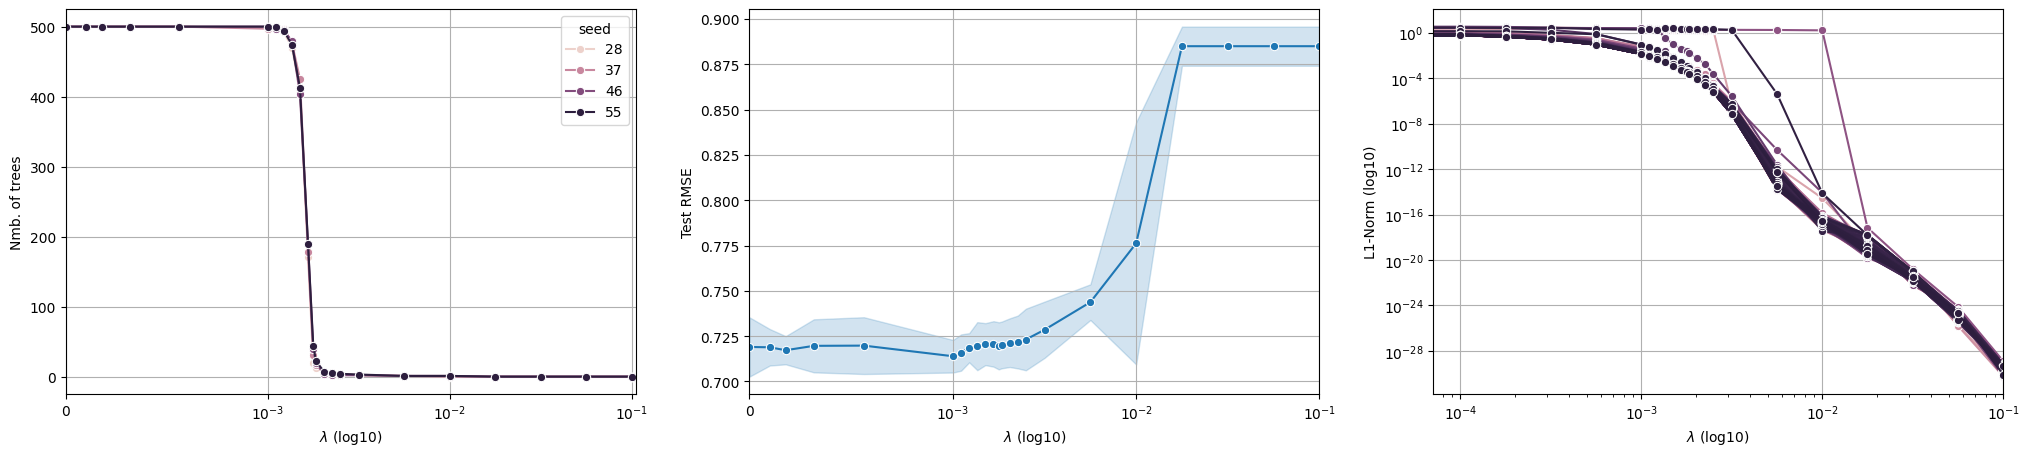

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
sns.lineplot(ax = axes[0], data=count_df, x="la_trees", y="count_trees", errorbar=('sd', 10), marker = "o", hue = "seed")
axes[0].set_xscale('symlog', linthresh=0.001)
axes[0].set_xlim(left=0)
axes[0].set_xlabel(r"$\lambda$ (log10)")
axes[0].set_ylabel("Nmb. of trees")
axes[0].grid(True)

sns.lineplot(ax = axes[1], data=data_cmpl, x="la_trees", y="rmse_rescaled", errorbar=('sd', 1), marker = "o")
axes[1].set_xscale('symlog', linthresh=0.001)
axes[1].set_xlim(left=0, right = 0.1)
axes[1].set_xlabel(r"$\lambda$ (log10)")
axes[1].set_ylabel("Test RMSE")
axes[1].grid(True)

sns.lineplot(ax = axes[2], data=df_plt_28, x="la_trees", y="coeff_norm", hue = "index", marker = "o")
axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].set_xlim(left=0, right = 0.1)
axes[2].set_xlabel(r"$\lambda$ (log10)")
axes[2].set_ylabel("L1-Norm (log10)")
axes[2].legend_.remove()
axes[2].grid(True)


plt.show()